In [61]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e10/sample_submission.csv
/kaggle/input/playground-series-s4e10/train.csv
/kaggle/input/playground-series-s4e10/test.csv


In [62]:
import numpy as np
import pandas as pd 

In [63]:
df = pd.read_csv("/kaggle/input/playground-series-s4e10/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s4e10/test.csv")

In [35]:
df.shape

(58645, 13)

In [36]:
df.head(10)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
5,5,27,45000,RENT,2.0,VENTURE,A,9000,8.94,0.20,N,5,0
6,6,25,45000,MORTGAGE,9.0,EDUCATION,A,12000,6.54,0.27,N,3,0
7,7,21,20000,RENT,0.0,PERSONAL,C,2500,13.49,0.13,Y,3,0
8,8,37,69600,RENT,11.0,EDUCATION,D,5000,14.84,0.07,Y,11,0
9,9,35,110000,MORTGAGE,0.0,DEBTCONSOLIDATION,C,15000,12.98,0.14,Y,6,0


In [37]:
df.shape

(58645, 13)

In [38]:
df.dtypes

id                              int64
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
loan_status                     int64
dtype: object

In [39]:
df.drop("id", axis=1, inplace=True)
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [40]:
# Split features and target
X = df.drop('loan_status', axis=1)
y = df['loan_status']

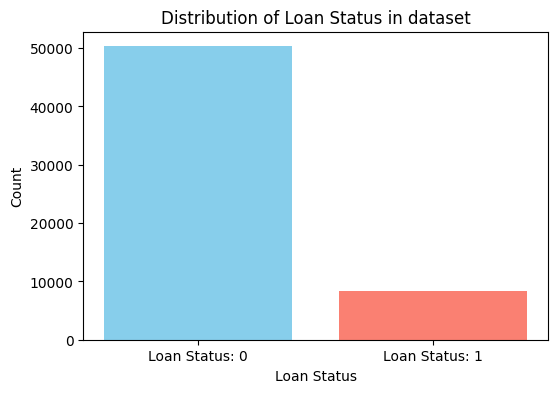

In [41]:
import matplotlib.pyplot as plt

# Count the unique values in y_train (0s and 1s)
value_counts = y.value_counts()

# Plot the distribution
plt.figure(figsize=(6,4))
plt.bar(value_counts.index, value_counts.values, color=['skyblue', 'salmon'])
plt.xticks([0, 1], ['Loan Status: 0', 'Loan Status: 1'])
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status in dataset')
plt.show()

In [42]:
print(value_counts)

loan_status
0    50295
1     8350
Name: count, dtype: int64


In [43]:
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3


In [44]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [45]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
numeric_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [46]:
X = preprocessor.fit_transform(X)

In [47]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE(sampling_strategy='auto', random_state=42)
print("Original dataset distribution:", Counter(y))

X, y = smote.fit_resample(X, y)

# Check the new distribution after SMOTE
print("Resampled dataset distribution:", Counter(y))

Original dataset distribution: Counter({0: 50295, 1: 8350})
Resampled dataset distribution: Counter({0: 50295, 1: 50295})


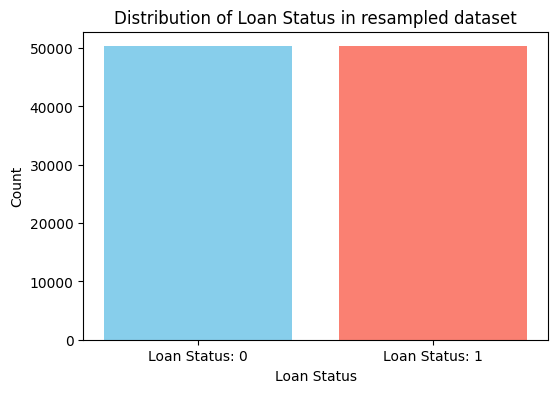

In [48]:
import matplotlib.pyplot as plt

# Count the unique values in y_train (0s and 1s)
value_counts = y.value_counts()

# Plot the distribution
plt.figure(figsize=(6,4))
plt.bar(value_counts.index, value_counts.values, color=['skyblue', 'salmon'])
plt.xticks([0, 1], ['Loan Status: 0', 'Loan Status: 1'])
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status in resampled dataset')
plt.show()

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [50]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(
    max_depth=10,              # Max depth of trees
    learning_rate=0.01,       # Learning rate (step size shrinkage)
    n_estimators=4000,         # Number of trees to be built
    subsample=0.8,            # Fraction of samples used per tree
    colsample_bytree=0.8,     # Fraction of features used per tree
    colsample_bylevel=0.8,    # Fraction of features per tree level
    min_child_weight=1,       # Minimum sum of instance weight in a child
    gamma=0.01,                # Minimum loss reduction required for split
    scale_pos_weight=1,       # Balancing positive/negative classes
    reg_alpha=0.025,           # L1 regularization
    reg_lambda=0.11,           # L2 regularization
    tree_method='hist',       # Use histogram-based algorithm
    # random_state=42,          # Seed for reproducibility
    objective='binary:logistic',  # For binary classification
    eval_metric='auc',        # Evaluation metric
    n_jobs=-1                 # Use all available cores
)

In [51]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.8, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0.01, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=4000, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [52]:
from sklearn.metrics import accuracy_score
y_pred_train = xgb_model.predict(X_train)
acc = accuracy_score(y_train, y_pred_train)
print(f"train accuracy: {acc}")

train accuracy: 0.9993413858236405


In [53]:
y_pred_test = xgb_model.predict(X_test)
acc = accuracy_score(y_test, y_pred_test)
print(f"test accuracy: {acc}")

test accuracy: 0.9731086589124167


In [54]:
ids = test['id']

In [55]:
X_new_test = test.drop(['id'], axis=1)

In [56]:
X_new_test_preprocessed = preprocessor.transform(X_new_test)

In [57]:
predictions = xgb_model.predict(X_new_test_preprocessed)
predictions_probs = xgb_model.predict_proba(X_new_test_preprocessed)

In [58]:
submission_df = pd.DataFrame({
    'id': ids,
    'loan_status': predictions_probs[:,1]
})

In [59]:
submission_df.head()

,id,loan_status
0,58645,0.999886
1,58646,0.005123
2,58647,0.931922
3,58648,0.010747
4,58649,0.037940


In [60]:
submission_df.to_csv('submission.csv', index=False)

print("Predictions saved to submission.csv")

Predictions saved to submission.csv
